# How to Improve Machine Learning Code Quality with Scikit-learn Pipeline and ColumnTransformer

**Redone by Cleiber Garcia**, based on the lessons learned from Yannawut Kimnaruk's article on creating a pipeline and a column transformer in the preprocessing phase of a Machine Learning project (https://www.freecodecamp.org/news/machine-learning-pipeline/#:~:text=The%20Scikit%2Dlearn%20pipeline%20is,leakage%20from%20the%20test%20set, accessed on June 18, 2023)

# 1. Background

## 1.1 Scikit-learn Pipeline

"The Scikit-learn pipeline is a tool that links all steps of data manipulation together to create a pipeline. It will shorten our code and make it easier to read and adjust. (We can even visualize our pipeline to see the steps inside.) It's also easier to perform GridSearchCV without data leakage from the test set.

Instead of transforming the dataframe step by step, the pipeline combines all transformation steps. We can get the same result with less code. It's also easier to understand data workflows and modify them for other projects.

Scikit-learn pipeline is an elegant way to create a machine learning model training workflow."

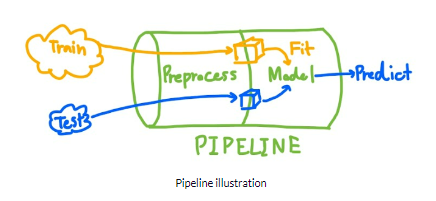

## 1.2 Column Transformer

"ColumnTransformer will transform each group of dataframe columns separately and combine them later. This is useful in the data preprocessing process.

This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer."

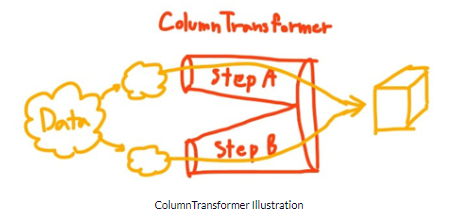

## 1.3 Pipeline versus Column Transformer

We use the pipeline for multiple transformations of the same columns while, on the other hand, we use the ColumnTransformer to transform each column set separately before combining them later.

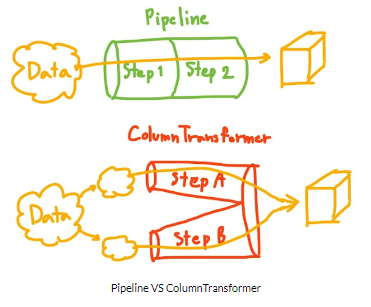

## 1.4 How to Create a Pipeline

In order to learn how to create a pipeline, first we will load a dataset (from Kaggle: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?datasetId=1019790&sortBy=voteCount&select=aug_train.csv) that contains information about job candidates and their decision about whether they want to change jobs or not. The dataset has both numerical and categorical columns.

Our goal is to predict whether a candidate will change jobs based on their information. This is a classification task.

# 2. Data Preprocessing 

### These are the steps that will be followed for the preprocessing:

#### 1. Import data and encoding
#### 2. Define sets of columns to be transformed in different ways
#### 3. Create pipelines for numerical and categorical features
#### 4. Create ColumnTransformer to apply pipeline for each column set
#### 5. Add a model to a final pipeline
#### 6. Display the pipeline
#### 7. Split the data  into train and test sets
#### 8. Pass data through the pipeline
#### 9. (Optional) Save the pipeline

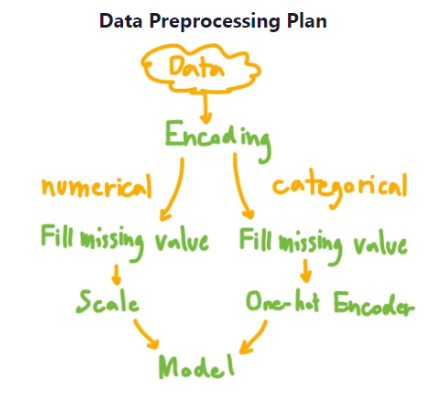

 Categorical feature encoding was skipped by Yannawut Kimnaruk for the simplicity of this article.

## Step 1: Import data and encoding

### 1.1 Loading the working data set

In [74]:
# Import Python modules
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [75]:
# Load the working data set

df = pd.read_csv("aug_train.csv")

In [76]:
# Print first five rows of the working data set
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [77]:
# Print column names, quantity and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [78]:
# Print the working data set's dimension
df.shape

(19158, 14)

### 1.2 Transforming categorical features into numerical features

Encoding the ordinal feature using mapping to transform categorical features into numerical features (since the model takes only numerical input).

In [79]:
# Encode ordinal feature using mapping to transform categorical features into numarical features

# Making Dictionaries of ordinal features

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [80]:
# Transform categorical features into numarical features

def encode(df_pre):
    df_pre.loc[:,'relevent_experience'] = df_pre['relevent_experience'].map(relevent_experience_map)
    df_pre.loc[:,'last_new_job'] = df_pre['last_new_job'].map(last_new_job_map)
    df_pre.loc[:,'experience'] = df_pre['experience'].map(experience_map)
    '''
    #encoding city feature using label encoder
    lb_en = LabelEncoder()

    df_pre.loc[:,'city'] = lb_en.fit_transform(df_pre.loc[:,'city']) 
    '''
    return df_pre

df = encode(df)

In [81]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


## Step 2: Define sets of columns to be transformed in different ways

Numerical and categorical data should be transformed in different ways. So num_cols and cat_cols were defined for numerical columns and for categorical columns, respectivelly.

In [82]:
num_cols = ['city_development_index','relevent_experience', 'experience','last_new_job', 'training_hours']

cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

In [83]:
# Numerical columns
num_cols

['city_development_index',
 'relevent_experience',
 'experience',
 'last_new_job',
 'training_hours']

In [84]:
# Categorical columns
cat_cols

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type']

In [85]:
# Divide train and test sets

from sklearn.model_selection import train_test_split

X = df[num_cols+cat_cols]
y = df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Step 3: Create Pipelines for Numerical and Categorical Features

For numerical features, it was performed the following actions:

* SimpleImputer to fill in the missing values with the mean of that column.
* MinMaxScaler to scale the value to range from 0 to 1 (this will affect regression performance).

For categorical features, it was performed the following actions:

* SimpleImputer to fill in the missing values with the most frequency value of that column.
* OneHotEncoder to split to many numerical columns for model training. (handle_unknown=’ignore’ is specified to prevent errors when it finds an unseen category in the test set)

In [86]:
# Create pipelines for numerical and categorical features
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

## Step 4: Create ColumnTransformer to apply pipeline for each column set

Pass numerical columns through the numerical pipeline and pass categorical columns through the categorical pipeline created in step 3.

remainder=’drop’ is specified to ignore other columns in a dataframe.

n_job = -1 means that we'll be using all processors to run in parallel.

In [87]:
# Create ColumnTransformer to apply pipeline for each column type
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

## Step 5: Add a model to a final pipeline

It was used the logistic regression model in this example.

It was created a new pipeline to commingle the ColumnTransformer in step 5 with the logistic regression model. It was used a pipeline in this case because the entire dataframe must pass the ColumnTransformer step and modeling step, respectively.

In [88]:
# Add a model to a final pipeline
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

## Step 6: Display the pipeline

In [90]:
# # Display the pipeline built
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

In [91]:
# Get the pipeline's parameters
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['city_development_index',
                                     'relevent_experience', 'experience',
                                     'last_new_job', 'training_hours']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['gender', 'enroll

## Step 7: Split the data into train and test sets

In [92]:
from sklearn.model_selection import train_test_split

X = df[num_cols+cat_cols]
y = df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [93]:
X.head()

,city_development_index,relevent_experience,experience,last_new_job,training_hours,gender,enrolled_university,education_level,major_discipline,company_size,company_type
0,0.920,1,21.0,1.0,36,Male,no_enrollment,Graduate,STEM,NaN,NaN
1,0.776,0,15.0,5.0,47,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,0.624,0,5.0,0.0,83,NaN,Full time course,Graduate,STEM,NaN,NaN
3,0.789,0,0.0,0.0,52,NaN,NaN,Graduate,Business Degree,NaN,Pvt Ltd
4,0.767,1,21.0,4.0,8,Male,no_enrollment,Masters,STEM,50-99,Funded Startup


In [94]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

## Step 8: Pass data through the pipeline

pipeline.fit passes data through a pipeline. It also fits the model.

pipeline.predict uses the model trained when pipeline.fits to predict new data.

pipeline.score gets a score of the model in the pipeline (accuracy of logistic regression in this example).

### 8.1 Fit the model

In [95]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

Model score: 0.7659185803757829


### 8.2 Prediction

In [96]:
clf_pipeline.predict(X_test)

array([0., 1., 0., ..., 0., 0., 0.])

In [97]:
clf_pipeline.predict_proba(X_test)

array([[0.60145567, 0.39854433],
       [0.41622834, 0.58377166],
       [0.56098725, 0.43901275],
       ...,
       [0.6682558 , 0.3317442 ],
       [0.76290493, 0.23709507],
       [0.51535233, 0.48464767]])

In [98]:
# Get feature name after pipeline (change column names only from one-hot encoder of categorical columns)

new_cat_cols = clf_pipeline.named_steps["col_trans"].named_transformers_["cat_pipeline"]\
                .named_steps["one-hot"].get_feature_names_out(cat_cols)
all_cols = np.concatenate([num_cols, new_cat_cols])

In [99]:
clf_pipeline.named_steps["col_trans"].named_transformers_["cat_pipeline"]\
                .named_steps["one-hot"].get_feature_names_out(cat_cols)

array(['gender_Female', 'gender_Male', 'gender_Other',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_Phd', 'education_level_Primary School',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_10/49', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99', 'company_size_500-999',
       'company_size_5000-9999', 'company_size_<10',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd'], dtype=object)

In [100]:
clf_pipeline.named_steps["col_trans"].named_transformers_["cat_pipeline"]\
                .named_steps["one-hot"].get_feature_names_out()

array(['x0_Female', 'x0_Male', 'x0_Other', 'x1_Full time course',
       'x1_Part time course', 'x1_no_enrollment', 'x2_Graduate',
       'x2_High School', 'x2_Masters', 'x2_Phd', 'x2_Primary School',
       'x3_Arts', 'x3_Business Degree', 'x3_Humanities', 'x3_No Major',
       'x3_Other', 'x3_STEM', 'x4_10/49', 'x4_100-500', 'x4_1000-4999',
       'x4_10000+', 'x4_50-99', 'x4_500-999', 'x4_5000-9999', 'x4_<10',
       'x5_Early Stage Startup', 'x5_Funded Startup', 'x5_NGO',
       'x5_Other', 'x5_Public Sector', 'x5_Pvt Ltd'], dtype=object)

In [101]:
# Get model coef

coefs = clf_pipeline.named_steps["model"].coef_.flatten()
coef = pd.DataFrame(zip(all_cols, coefs), columns=["feature", "coef"])
coef["abs_coef"] = coef["coef"].apply(lambda x: abs(x))
coef["colors"] = coef["coef"].apply(lambda x: "green" if x > 0 else "red")
coef = coef.sort_values("abs_coef", ascending=False)

Text(0.5, 0, 'Feature Name')

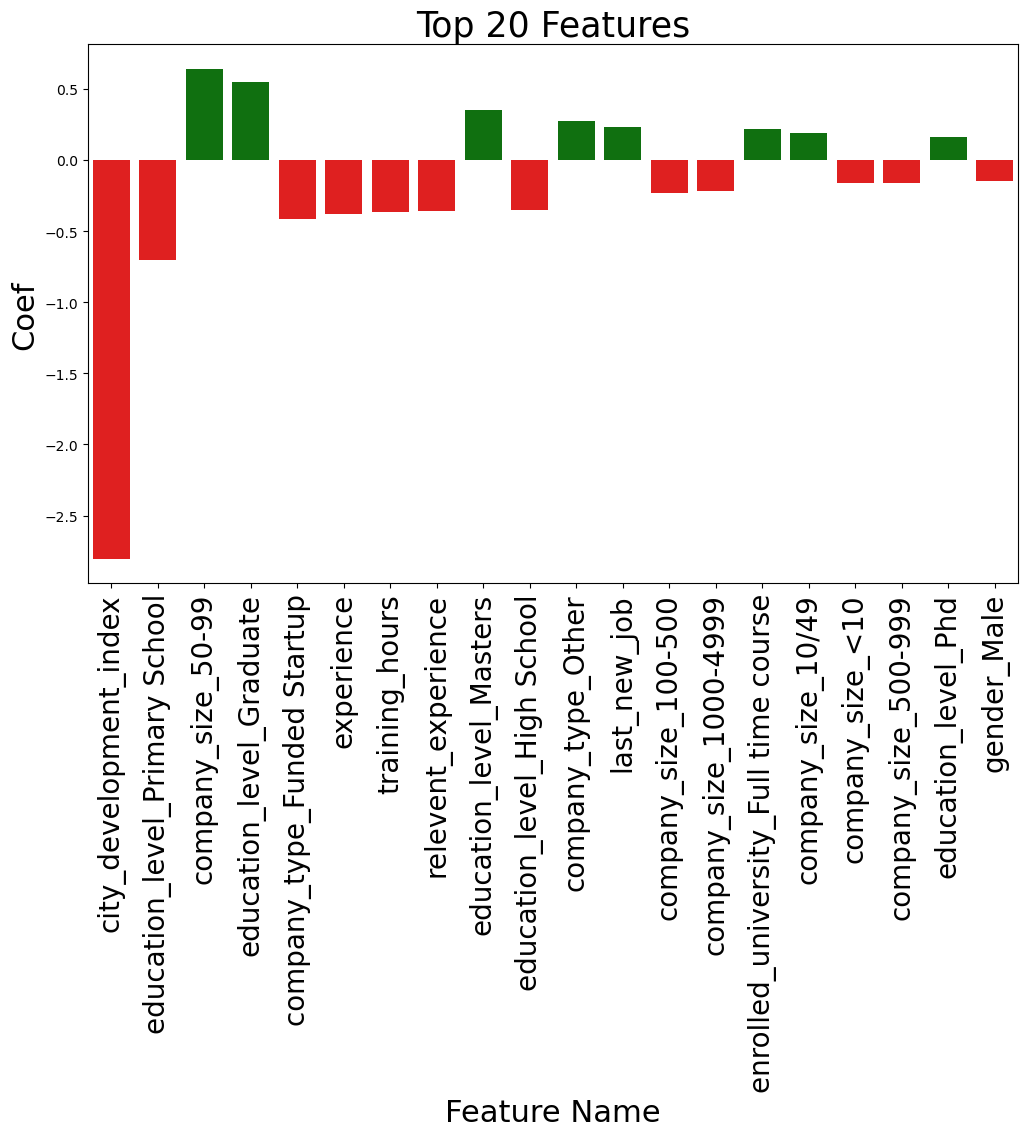

In [103]:
# Plot coef
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="coef",
            data=coef.head(20),
           palette=coef.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

### Step 9: (Optional) Save the pipeline
We use the joblib library to save the pipeline for later use, so we don’t need to create and fit the pipeline again. When we want to use a saved pipeline, we have just to load the file using joblib.load like this:

#### Importing joblib Module

In [104]:
import joblib

#### Saving the pipeline

In [105]:
# Save pipeline to file "pipe.joblib"
joblib.dump(clf_pipeline,"pipe.joblib")

['pipe.joblib']

#### Loading the pipeline

In [106]:
# Load pipeline when you want to use
same_pipe = joblib.load("pipe.joblib")
same_pipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

# 3. How to Find the Best Hyperparameter and Data Preparation Method

A pipeline does not only make our code tidier, it can also help us optimize hyperparameters and data preparation methods.

**What will be covered in this section:**
* 3.1. How to find the changeable pipeline parameters
* 3.2. How to find the best hyperparameter sets: Add a pipeline to Grid Search
* 3.3. How to find the best data preparation method: Skip a step in a pipeline
* 3.4. How to Find the best hyperparameter sets and the best data preparation method

## 3.1 How to Find the Changeable Pipeline Parameters

In [107]:
# Print the list of parameters that can be tuned
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['city_development_index',
                                     'relevent_experience', 'experience',
                                     'last_new_job', 'training_hours']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['gender', 'enroll

## 3.2. How to find the best hyperparameter sets: Add a pipeline to Grid Search
Grid Search is a method we can use to perform hyperparameter tuning. It helps us find the optimum parameter sets that yield the highest model accuracy.

### 3.2.1 Set the tuning parameters and their range.
Create a dictionary of tuning parameters (hyperparameters)

In this example, it is find the best penalty type and C of a logistic regression model.

In [136]:
clf_pipeline.set_params(model__C = 10)

grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

grid_params

{'model__penalty': ['none', 'l2'],
 'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}

### 3.2.2 Add the pipeline to Grid Search
Our pipeline has a model step as the final step, so we can input the pipeline directly to the GridSearchCV function

In [109]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

Best Score of train set: 0.7691510850468593
Best parameter set: {'model__C': 4.281332398719396, 'model__penalty': 'l2'}
Test Score: 0.7664405010438413


After setting Grid Search, we can fit Grid Search with the data and see the results. Let's see what the code is doing:

* .fit: fits the model and tries all sets of parameters in the tuning parameter dictionary
* .best_score_: the highest accuracy across all sets of parameters
* .best_params_: The set of parameters that yield the best score
* .score(X_test,y_test): The score when trying the best model with the test set.

More on GridSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## 3.3. How to find the best data preparation method: Skip a step in a pipeline
With the pipeline, we can create data transformation steps in the pipeline and perform a grid search to find the best step. A grid search will select which step to skip and compare the result of each case.

### 3.3.1 How to adjust the current pipeline a little
We want to know which scaling method will work best for our data between MinMaxScaler and StandardScaler.

We add a step StandardScaler in the num_pipeline. The rest doesn't change

In [110]:
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('minmax_scale', MinMaxScaler()),
    ('std_scale', StandardScaler()),
])

col_trans2 = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline2,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)
    
clf_pipeline2 = Pipeline(steps=[
    ('col_trans', col_trans2),
    ('model', clf)
])

clf_pipeline2

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax_scale',
                                                                   MinMaxScaler()),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(C=1, random_state=0))])

### 3.3.2 How to Perform Grid Search
In grid search parameters, we specify the steps we want to skip and set their value to passthrough.

Since MinMaxScaler and StandardScaler should not perform at the same time, we will use a list of dictionaries for the grid search parameters.

If using a list of dictionaries, grid search will perform a combination of every parameter in case 1 until complete. Then, it will perform a combination of every parameter in case 2. So there is no case where MinMaxScaler and StandardScaler are used together.

In [111]:
grid_step_params = [{'col_trans__num_pipeline__minmax_scale': ['passthrough']},
                    {'col_trans__num_pipeline__std_scale': ['passthrough']}]

Then we perform Grid Search and print the results (like a normal grid search).

In [112]:
# Grid search
gs2 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs2.fit(X_train, y_train)

print("Best Score of train set: "+str(gs2.best_score_))
print("Best parameter set: "+str(gs2.best_params_))
print("Test Score: "+str(gs2.score(X_test,y_test)))

Best Score of train set: 0.7688900949103411
Best parameter set: {'col_trans__num_pipeline__minmax_scale': 'passthrough'}
Test Score: 0.7661795407098121


The best case is minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.

## 3.4. How to Find the best hyperparameter sets and the best data preparation method

We can find the best hyperparameter sets and the best data preparation method by adding tuning parameters to the dictionary of each case of the data preparation method.

In [113]:
# Set tuning parameters in grid params
# Set step parameters in grid_step_params

grid_params = {'model__penalty' : ['none', 'l2'],
    'model__C' : np.logspace(-4, 4, 20)}

grid_step_params2 = [{**{'col_trans__num_pipeline__minmax_scale': ['passthrough']}, **grid_params},
                    {**{'col_trans__num_pipeline__std_scale': ['passthrough']}, **grid_params}]

# Grid search
gs3 = GridSearchCV(clf_pipeline2, grid_step_params2, scoring='accuracy')
gs3.fit(X_train, y_train)

print("Best Score of train set: "+str(gs3.best_score_))
print("Best parameter set: "+str(gs3.best_params_))
print("Test Score: "+str(gs3.score(X_test,y_test)))

Best Score of train set: 0.7691510850468593
Best parameter set: {'col_trans__num_pipeline__std_scale': 'passthrough', 'model__C': 4.281332398719396, 'model__penalty': 'l2'}
Test Score: 0.7664405010438413


We can find the best parameter set using .best_params_. As minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.

We can show all grid search cases using .cv_results_:

In [114]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_col_trans__num_pipeline__minmax_scale,param_model__C,param_model__penalty,param_col_trans__num_pipeline__std_scale,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.408218,0.047738,0.042435,0.003674,passthrough,0.0001,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
1,0.191747,0.023056,0.042047,0.003394,passthrough,0.0001,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.750489,0.750734,0.750734,0.750734,0.750408,0.750620,0.000142,77
2,0.320811,0.061213,0.037959,0.002462,passthrough,0.000264,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
3,0.189608,0.008972,0.050610,0.020138,passthrough,0.000264,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.751794,0.751387,0.751060,0.750408,0.750408,0.751011,0.000545,75
4,0.270394,0.010344,0.036789,0.001135,passthrough,0.000695,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.330351,0.026977,0.039321,0.003724,NaN,1438.449888,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
76,0.327820,0.035251,0.042825,0.003200,NaN,3792.690191,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
77,0.305434,0.036680,0.039321,0.003292,NaN,3792.690191,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5
78,0.252096,0.008214,0.034843,0.001135,NaN,10000.0,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.759622,0.770962,0.773246,0.767047,0.774225,0.769021,0.005309,5


There are 80 cases for this example. There's running time and accuracy of each case for we to consider, since sometimes we may select the fastest model with acceptable accuracy instead of the highest accuracy one.

# 4. How to Add Custom Transformations and Find the Best Machine Learning Model

Searching for the best machine learning model can be a time-consuming task. The pipeline can make this task much more convenient so that we can shorten the model training and evaluation loop.

## 4.1 How to Add a Custom Transformation
Apart from standard data transformation functions such as MinMaxScaler from sklearn, we can also create our own transformation for our data.

In the example below, it will be created a class method to encode ordinal features using mapping to transform categorical features into numerical ones. In simple words, we are going to change data from text to numbers.

First it will be done the required data processing before regression model training.

In [115]:
# Create custom transformation class

from sklearn.base import TransformerMixin

class Encode(TransformerMixin):
    # Encode ordinal feature using mapping to transform categorical features into numarical features
    def __init__(self):
        print("---------init----------")
        # Making Dictionaries of ordinal features
        self.relevent_experience_map = {
            'Has relevent experience':  1,
            'No relevent experience':    0
        }

        self.experience_map = {
            '<1'      :    0,
            '1'       :    1, 
            '2'       :    2, 
            '3'       :    3, 
            '4'       :    4, 
            '5'       :    5,
            '6'       :    6,
            '7'       :    7,
            '8'       :    8, 
            '9'       :    9, 
            '10'      :    10, 
            '11'      :    11,
            '12'      :    12,
            '13'      :    13, 
            '14'      :    14, 
            '15'      :    15, 
            '16'      :    16,
            '17'      :    17,
            '18'      :    18,
            '19'      :    19, 
            '20'      :    20, 
            '>20'     :    21
        } 

        self.last_new_job_map = {
            'never'        :    0,
            '1'            :    1, 
            '2'            :    2, 
            '3'            :    3, 
            '4'            :    4, 
            '>4'           :    5
        }
        
    def fit(self, df, y = None):
        print("---------fit----------")
        return self
        
    def transform(self, df, y = None):
        print("---------transform----------")
        df_pre = df.copy()
        df_pre.loc[:,'relevent_experience'] = df_pre['relevent_experience'].map(self.relevent_experience_map)
        df_pre.loc[:,'last_new_job'] = df_pre['last_new_job'].map(self.last_new_job_map)
        df_pre.loc[:,'experience'] = df_pre['experience'].map(self.experience_map)
        return df_pre
        

In [116]:
from sklearn.pipeline import Pipeline

encode_pipeline = Pipeline(steps=[('encode', Encode())])

---------init----------


In [117]:
###pipeline = Pipeline(steps=[
###    ('Encode', Encode()),
###    ('col_trans', col_trans),
###    ('model', LogisticRegression())
###])

In [118]:
encode_pipeline.fit(df)

---------fit----------


Pipeline(steps=[('encode', <__main__.Encode object at 0x000001EDD609A260>)])

In [119]:
encode_pipeline.transform(df)

---------transform----------


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,NaN,no_enrollment,Graduate,STEM,NaN,NaN,NaN,NaN,36,1.0
1,29725,city_40,0.776,Male,NaN,no_enrollment,Graduate,STEM,NaN,50-99,Pvt Ltd,NaN,47,0.0
2,11561,city_21,0.624,NaN,NaN,Full time course,Graduate,STEM,NaN,NaN,NaN,NaN,83,0.0
3,33241,city_115,0.789,NaN,NaN,NaN,Graduate,Business Degree,NaN,NaN,Pvt Ltd,NaN,52,1.0
4,666,city_162,0.767,Male,NaN,no_enrollment,Masters,STEM,NaN,50-99,Funded Startup,NaN,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,NaN,no_enrollment,Graduate,Humanities,NaN,NaN,NaN,NaN,42,1.0
19154,31398,city_103,0.920,Male,NaN,no_enrollment,Graduate,STEM,NaN,NaN,NaN,NaN,52,1.0
19155,24576,city_103,0.920,Male,NaN,no_enrollment,Graduate,STEM,NaN,50-99,Pvt Ltd,NaN,44,0.0
19156,5756,city_65,0.802,Male,NaN,no_enrollment,High School,NaN,NaN,500-999,Pvt Ltd,NaN,97,0.0


## 4.2 How to Find the Best Machine Learning Model
The first solution that come mind is to add many model steps in a pipeline and to skip a step by changing the step value to ‘passthrough’ in the grid search. This is like what was done when finding the best data preparation method.

### Multiple classifier in a pipeline

In [120]:
# Create custom transformation class

from sklearn.base import TransformerMixin

class Encode(TransformerMixin):
    # Encode ordinal feature using mapping to transform categorical features into numarical
    
    def __init__(self):
        # Making Dictionaries of ordinal features
        self.relevent_experience_map = {
            'Has relevent experience':  1,
            'No relevent experience':    0
        }

    def fit(self, df, y = None):
        return self
        
    def transform(self, df, y = None):
        df_pre = df.copy()
        df_pre.loc[:,'relevent_experience'] = df_pre['relevent_experience'].map(self.relevent_experience_map)
        return df_pre

In [121]:
from sklearn.base import TransformerMixin
class Encode_temp(TransformerMixin):
    # Encode ordinal feature using mapping to transform categorical features into numarical
    
    def __init__(self):
        # Making Dictionaries of ordinal features
        self.rel_exp_map = {
            'Has relevent experience':  1,
            'No relevent experience':    0
        }
    def fit(self, df, y = None):
        return self
        
    def transform(self, df, y = None):
        df_pre = df.copy()
        df_pre.loc[:,'rel_exp'] = df_pre['relevent_experience']\
                               .map(self.rel_exp_map)
        return df_pre

In [122]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LogisticRegression()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [123]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('Encode', Encode()),
    ('clf', ClfSwitcher())
])

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = [
    {
        'clf__estimator': [LogisticRegression()], # SVM if hinge loss / logreg if log loss
        'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
        'tfidf__stop_words': ['english', None],
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4],
        'clf__estimator__loss': ['hinge', 'log', 'modified_huber'],
    },
    {
        'clf__estimator': [SVC(gamma='auto')],
        'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
        'tfidf__stop_words': [None],
        'clf__estimator__alpha': (1e-2, 1e-3, 1e-1),
    },
]

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, return_train_score=False, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


ValueError: Invalid parameter 'tfidf' for estimator Pipeline(steps=[('Encode', <__main__.Encode object at 0x000001F08552F940>),
                ('clf', ClfSwitcher())]). Valid parameters are: ['memory', 'steps', 'verbose'].

### Full pipeline

In [126]:
# Create custom transformation class

from sklearn.base import TransformerMixin

class Encode(TransformerMixin):
    # Encode ordinal feature using mapping to transform categorical features into numarical features
    def __init__(self):
        print("---------init----------")
        # Making Dictionaries of ordinal features
        self.relevent_experience_map = {
            'Has relevent experience':  1,
            'No relevent experience':    0
        }

        self.experience_map = {
            '<1'      :    0,
            '1'       :    1, 
            '2'       :    2, 
            '3'       :    3, 
            '4'       :    4, 
            '5'       :    5,
            '6'       :    6,
            '7'       :    7,
            '8'       :    8, 
            '9'       :    9, 
            '10'      :    10, 
            '11'      :    11,
            '12'      :    12,
            '13'      :    13, 
            '14'      :    14, 
            '15'      :    15, 
            '16'      :    16,
            '17'      :    17,
            '18'      :    18,
            '19'      :    19, 
            '20'      :    20, 
            '>20'     :    21
        } 

        self.last_new_job_map = {
            'never'        :    0,
            '1'            :    1, 
            '2'            :    2, 
            '3'            :    3, 
            '4'            :    4, 
            '>4'           :    5
        }
        
    def fit(self, df, y = None):
        print("---------fit----------")
        return self
        
    def transform(self, df, y = None):
        print("---------transform----------")
        df_pre = df.copy()
        df_pre.loc[:,'relevent_experience'] = df_pre['relevent_experience'].map(self.relevent_experience_map)
        df_pre.loc[:,'last_new_job'] = df_pre['last_new_job'].map(self.last_new_job_map)
        df_pre.loc[:,'experience'] = df_pre['experience'].map(self.experience_map)
        return df_pre

In [127]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LogisticRegression()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [128]:
# sets of columns to be transformed in different ways

num_cols = ['city_development_index','relevent_experience', 'experience','last_new_job', 'training_hours']
cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

In [129]:
# Divide train and test sets

from sklearn.model_selection import train_test_split

X = df[num_cols+cat_cols]
y = df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [130]:
# Create pipelines for numerical and categorical features

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [132]:
# Create ColumnTransformer to apply pipeline for each column type

from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

In [133]:
# Add a model to a final pipeline

full_pipeline = Pipeline(steps=[
    ('Encode', Encode()),
    ('col_trans', col_trans),
    ('model', ClfSwitcher())
])

---------init----------


In [134]:
# Display pipeline

from sklearn import set_config
set_config(display='diagram')

display(full_pipeline)

# if desired, set display back to the default
# set_config(display='text')

Pipeline(steps=[('Encode', <__main__.Encode object at 0x000001EDD8878AC0>),
                ('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', ClfSwitcher())])

In [135]:
grid_params = [
    {'model__estimator': [LogisticRegression()]},
    {'model__estimator': [SVC(gamma='auto')]}
]

### Step 1: Create a class that receives a model as an input

In [60]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LogisticRegression()):
            self.estimator = estimator
        
    def fit(self, X, y=None, **kwargs):
            self.estimator.fit(X, y)
            return self
        
    def predict(self, X, y=None):
            return self.estimator.predict(X)
        
    def predict_proba(self, X):
            return self.estimator.predict_proba(X)
        
    def score(self, X, y):
            return self.estimator.score(X, y)

### Step 2: Add the class in step 1 to a pipeline

In [61]:
clf_pipeline = Pipeline(steps=[
    ('Encode', Encode()),
    ('col_trans', col_trans),
    ('model', ClfSwitcher())
])

---------init----------


### Step 3: Perform Grid search

There are 2 cases using different classification models in grid search parameters, including logistic regression and support vector machine.

In [62]:
from sklearn.model_selection import GridSearchCV

grid_params = [
    {'model__estimator': [LogisticRegression()]},
    {'model__estimator': [SVC(gamma='auto')]}
]

gs = GridSearchCV(clf_pipeline, grid_params, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
---------transform----------
---------fit----------
---------transform----------
Best Score of train set: 0.7647139334850792
Best parameter set: {'model__estimator': LogisticRegression()}
---------transform----------
Te

The result shows that logistic regression yields the best result.

### Step 4: Print grid search results as a table

In [63]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.414840,3.891343,0.058008,0.006206,LogisticRegression(),{'model__estimator': LogisticRegression()},0.758969,0.765090,0.751387,0.771941,0.776183,0.764714,0.008883,1
1,17.437628,0.571362,5.400328,0.186182,SVC(gamma='auto'),{'model__estimator': SVC(gamma='auto')},0.747228,0.747145,0.735400,0.758238,0.765090,0.750620,0.010224,2


# 5. Conclusion
We can implement the Scikit-learn pipeline and ColumnTransformer from the data cleaning to the data modeling steps to make our code neater.

We can also find the best hyperparameter, data preparation method, and machine learning model with grid search and the passthrough keyword.